In [1]:
import numpy as np
import pylab as plt
import networkx as nx

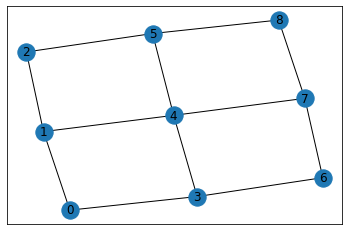

In [9]:
# map cell to cell, add circular cell to goal point
goal = 3

points_count = 9

points_list = [
    (0,1), (0, 3), (1, 2), (1, 4), (2,5),
    (3, 4), (3, 6), (4, 5), (4 ,7), (5, 8),
    (6,7), (7 , 8)
]


G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [10]:
# how many points in graph? x points
MATRIX_SIZE = points_count

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [4]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(0, 3)
(1, 2)
(1, 4)
(2, 5)
(3, 4)
(3, 6)
(4, 5)
(4, 7)
(5, 8)
(6, 7)
(7, 8)


matrix([[ -1.,   0.,  -1., 100.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1., 100.,   0.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1., 100.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1., 100.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,   0.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.]])

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 0

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 100.0


100.0

In [6]:
# Training
scores = []
for i in range(1500):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

4
[1 3 5 7]
7
max_value 0.0
Score: 100.0
3
[0 3 4 6]
0
max_value 80.0
Score: 180.0
3
[0 3 4 6]
3
max_value 164.0
Score: 209.7560975609756
8
[5 7]
7
max_value 0.0
Score: 209.7560975609756
4
[1 3 5 7]
1
max_value 0.0
Score: 209.7560975609756
5
[2 4 8]
4
max_value 0.0
Score: 209.7560975609756
7
[4 6 8]
6
max_value 0.0
Score: 209.7560975609756
6
[3 7]
7
max_value 0.0
Score: 209.7560975609756
0
[1 3]
1
max_value 0.0
Score: 209.7560975609756
1
[0 2 4]
2
max_value 0.0
Score: 209.7560975609756
4
[1 3 5 7]
3
max_value 231.20000000000002
Score: 248.78892733564015
4
[1 3 5 7]
3
max_value 231.20000000000002
Score: 248.78892733564015
3
[0 3 4 6]
0
max_value 80.0
Score: 248.78892733564015
7
[4 6 8]
6
max_value 0.0
Score: 248.78892733564015
0
[1 3]
1
max_value 0.0
Score: 248.78892733564015
7
[4 6 8]
6
max_value 0.0
Score: 248.78892733564015
3
[0 3 4 6]
6
max_value 0.0
Score: 248.78892733564015
7
[4 6 8]
6
max_value 0.0
Score: 248.78892733564015
0
[1 3]
3
max_value 231.20000000000002
Score: 305.536332

[1 3]
3
max_value 401.16332339200005
Score: 1493.1623538754075
5
[2 4 8]
8
max_value 176.93065871360005
Score: 1493.1623538754075
7
[4 6 8]
8
max_value 176.93065871360005
Score: 1498.0898570066656
6
[3 7]
3
max_value 401.16332339200005
Score: 1521.5724891165678
6
[3 7]
7
max_value 196.45415424
Score: 1521.5724891165678
1
[0 2 4]
2
max_value 176.93065871360005
Score: 1521.5724891165678
7
[4 6 8]
4
max_value 276.45415424000004
Score: 1541.0358222996224
6
[3 7]
7
max_value 221.16332339200005
Score: 1547.1952012136949
4
[1 3 5 7]
3
max_value 401.16332339200005
Score: 1561.0538037703586
4
[1 3 5 7]
3
max_value 401.16332339200005
Score: 1561.0538037703586
0
[1 3]
3
max_value 401.16332339200005
Score: 1561.0538037703586
7
[4 6 8]
8
max_value 176.93065871360005
Score: 1561.0538037703586
1
[0 2 4]
0
max_value 320.93065871360005
Score: 1572.1406858156893
2
[1 5]
5
max_value 221.16332339200005
Score: 1572.1406858156893
2
[1 5]
5
max_value 221.16332339200005
Score: 1572.1406858156893
4
[1 3 5 7]
3

[3 7]
7
max_value 279.5164972613633
Score: 1820.8000000000002
4
[1 3 5 7]
7
max_value 279.5164972613633
Score: 1820.8000000000002
1
[0 2 4]
4
max_value 349.3956215767041
Score: 1820.8000000000002
7
[4 6 8]
6
max_value 349.3956215767041
Score: 1820.8000000000002
0
[1 3]
1
max_value 279.5164972613633
Score: 1820.8000000000002
4
[1 3 5 7]
3
max_value 449.3956215767041
Score: 1772.3571524232439
2
[1 5]
1
max_value 279.5164972613633
Score: 1772.3571524232439
7
[4 6 8]
6
max_value 349.3956215767041
Score: 1772.3571524232439
8
[5 7]
7
max_value 279.5164972613633
Score: 1772.3571524232439
5
[2 4 8]
4
max_value 359.5164972613633
Score: 1774.6092606322982
2
[1 5]
5
max_value 287.61319780909065
Score: 1776.4109471995414
1
[0 2 4]
2
max_value 230.09055824727253
Score: 1777.852296453336
0
[1 3]
3
max_value 449.3956215767041
Score: 1780.667431714654
5
[2 4 8]
4
max_value 359.5164972613633
Score: 1780.667431714654
6
[3 7]
7
max_value 279.5164972613633
Score: 1780.667431714654
3
[0 3 4 6]
6
max_value 

[1 3 5 7]
7
max_value 306.7343658226036
Score: 1790.8313292950577
3
[0 3 4 6]
3
max_value 479.2724465978181
Score: 1791.912528180437
0
[1 3]
1
max_value 306.7343658226036
Score: 1794.5506534607625
0
[1 3]
3
max_value 483.4179572782545
Score: 1780.019174588912
2
[1 5]
1
max_value 306.7343658226036
Score: 1780.019174588912
1
[0 2 4]
4
max_value 383.4179572782545
Score: 1780.019174588912
0
[1 3]
1
max_value 306.7343658226036
Score: 1780.019174588912
1
[0 2 4]
4
max_value 383.4179572782545
Score: 1780.019174588912
7
[4 6 8]
8
max_value 245.3874926580829
Score: 1782.111576393184
6
[3 7]
7
max_value 306.7343658226036
Score: 1782.111576393184
4
[1 3 5 7]
5
max_value 294.09055824727255
Score: 1782.111576393184
2
[1 5]
1
max_value 306.7343658226036
Score: 1782.111576393184
5
[2 4 8]
2
max_value 245.3874926580829
Score: 1784.2039781974559
0
[1 3]
3
max_value 483.4179572782545
Score: 1784.2039781974559
0
[1 3]
3
max_value 483.4179572782545
Score: 1784.2039781974559
0
[1 3]
3
max_value 483.4179572

1
[0 2 4]
4
max_value 394.5663962409385
Score: 1817.4996250015602
8
[5 7]
5
max_value 315.6531169927508
Score: 1817.4996250015602
8
[5 7]
5
max_value 315.6531169927508
Score: 1817.4996250015602
4
[1 3 5 7]
1
max_value 315.6531169927508
Score: 1817.4996250015602
1
[0 2 4]
4
max_value 394.5663962409385
Score: 1817.4996250015602
6
[3 7]
3
max_value 494.5663962409385
Score: 1817.4996250015602
6
[3 7]
3
max_value 494.5663962409385
Score: 1817.4996250015602
1
[0 2 4]
0
max_value 395.6531169927508
Score: 1817.7193570254244
3
[0 3 4 6]
0
max_value 395.6531169927508
Score: 1817.7193570254244
6
[3 7]
7
max_value 316.5224935942007
Score: 1817.7193570254244
4
[1 3 5 7]
1
max_value 316.5224935942007
Score: 1817.8951426445158
8
[5 7]
5
max_value 315.6531169927508
Score: 1817.8951426445158
5
[2 4 8]
4
max_value 394.5663962409385
Score: 1817.8951426445158
6
[3 7]
7
max_value 316.5224935942007
Score: 1817.8951426445158
8
[5 7]
5
max_value 315.6531169927508
Score: 1817.8951426445158
1
[0 2 4]
4
max_valu

Score: 1818.5784188105263
7
[4 6 8]
4
max_value 397.21799487536055
Score: 1818.8935863815423
0
[1 3]
3
max_value 496.5224935942007
Score: 1818.8935863815423
6
[3 7]
7
max_value 317.7743959002885
Score: 1819.1457204383553
3
[0 3 4 6]
0
max_value 397.21799487536055
Score: 1819.2857949143624
8
[5 7]
7
max_value 317.7743959002885
Score: 1819.3978544951683
0
[1 3]
3
max_value 496.5224935942007
Score: 1819.3978544951683
3
[0 3 4 6]
0
max_value 397.21799487536055
Score: 1819.3978544951683
3
[0 3 4 6]
3
max_value 496.5224935942007
Score: 1819.5729475901771
8
[5 7]
7
max_value 317.7743959002885
Score: 1819.5729475901771
4
[1 3 5 7]
5
max_value 317.7743959002885
Score: 1819.6850071709828
8
[5 7]
7
max_value 317.7743959002885
Score: 1819.6850071709828
5
[2 4 8]
8
max_value 254.21951672023079
Score: 1819.7746548356276
0
[1 3]
3
max_value 497.21799487536055
Score: 1817.3690591249488
5
[2 4 8]
8
max_value 254.21951672023079
Score: 1817.3690591249488
0
[1 3]
3
max_value 497.21799487536055
Score: 1817

max_value 319.8470576508464
Score: 1819.662146664623
3
[0 3 4 6]
0
max_value 399.7610275794475
Score: 1819.662146664623
5
[2 4 8]
4
max_value 399.808822063558
Score: 1819.662146664623
5
[2 4 8]
2
max_value 255.8470576508464
Score: 1819.7482851164436
1
[0 2 4]
0
max_value 399.7610275794475
Score: 1819.7482851164436
4
[1 3 5 7]
7
max_value 319.6266055928866
Score: 1819.9015813619812
8
[5 7]
7
max_value 319.6266055928866
Score: 1819.9015813619812
8
[5 7]
7
max_value 319.6266055928866
Score: 1819.9015813619812
2
[1 5]
1
max_value 319.8470576508464
Score: 1819.9456928564343
8
[5 7]
7
max_value 319.6266055928866
Score: 1819.9456928564343
8
[5 7]
5
max_value 319.8470576508464
Score: 1819.95334363054
8
[5 7]
5
max_value 319.8470576508464
Score: 1819.95334363054
7
[4 6 8]
8
max_value 255.87764612067713
Score: 1819.9594642498246
7
[4 6 8]
4
max_value 399.808822063558
Score: 1820.014603617891
5
[2 4 8]
4
max_value 399.808822063558
Score: 1820.014603617891
7
[4 6 8]
6
max_value 399.7610275794475
S

6
max_value 399.9021168965417
Score: 1820.7850691730334
6
[3 7]
7
max_value 319.9216935172334
Score: 1820.7850691730334
1
[0 2 4]
4
max_value 399.9021168965417
Score: 1820.7850691730334
1
[0 2 4]
0
max_value 399.9021168965417
Score: 1820.7850691730334
7
[4 6 8]
8
max_value 255.93735481378673
Score: 1820.7850691730334
5
[2 4 8]
8
max_value 255.93735481378673
Score: 1820.7850691730334
5
[2 4 8]
8
max_value 255.93735481378673
Score: 1820.7850691730334
5
[2 4 8]
2
max_value 255.93735481378673
Score: 1820.7850691730334
3
[0 3 4 6]
0
max_value 399.9021168965417
Score: 1820.7850691730334
8
[5 7]
7
max_value 319.9216935172334
Score: 1820.7850691730334
0
[1 3]
3
max_value 499.8776461206771
Score: 1820.7850691730334
3
[0 3 4 6]
6
max_value 399.9021168965417
Score: 1820.7850691730334
7
[4 6 8]
6
max_value 399.9021168965417
Score: 1820.7850691730334
8
[5 7]
5
max_value 319.9216935172334
Score: 1820.7850691730334
4
[1 3 5 7]
5
max_value 319.9216935172334
Score: 1820.7938808086203
2
[1 5]
5
max_valu

max_value 319.9498838510294
Score: 1820.700182431477
6
[3 7]
7
max_value 319.9498838510294
Score: 1820.700182431477
1
[0 2 4]
0
max_value 399.9498838510294
Score: 1820.709736780029
7
[4 6 8]
6
max_value 399.9373548137867
Score: 1820.709736780029
3
[0 3 4 6]
0
max_value 399.9498838510294
Score: 1820.709736780029
2
[1 5]
1
max_value 319.95990708082354
Score: 1820.7117416269382
0
[1 3]
3
max_value 499.95990708082354
Score: 1820.679750690775
8
[5 7]
5
max_value 319.9498838510294
Score: 1820.679750690775
Trained Q matrix:
[[  0.          63.99510827   0.         100.           0.
    0.           0.           0.           0.        ]
 [ 79.99639135   0.          51.19608662   0.          79.99388534
    0.           0.           0.           0.        ]
 [  0.          63.99711308   0.           0.           0.
   63.99510827   0.           0.           0.        ]
 [ 79.99639135   0.           0.          99.99799519  79.99388534
    0.          79.99388534   0.           0.        ]
 [  0

Most efficient path:
[2, 1, 0, 3]


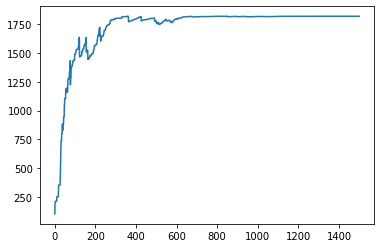

In [8]:
# Testing
current_state = 2
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()